# 챕터 13 실습 코드들 

## 13.2. 인공지능 모델 학습 준비

####코드 예제 13.2.1-1: 챕터 13의 실습에 필요한 라이브러리 불러오기

In [ ]:
# 데이터 전처리와 정제에 필요한 라이브러리들
import numpy as np
import pandas as pd 

In [ ]:
# 시각화에 필요한 라이브러리들
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# 모델학습, 정규화, 평가에 필요한 라이브러리들
import sklearn
from sklearn import linear_model 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

####코드 예제 13.2.2-1: 챕터 13의 실습에 필요한 데이터 불러오기

In [ ]:
# 데이터 로딩
box_df = pd.read_csv("https://raw.githubusercontent.com/skku-ai-textbook/aitextbook/main/data/CH12-data.csv")
print('\n 영화 박스 오피스 데이타 셋은 {0} 행과 {1} 열로 구성되어 있습니다'.format(*box_df.shape))


 영화 박스 오피스 데이타 셋은 3926 행과 30 열로 구성되어 있습니다


In [ ]:
# 데이터프레임 다섯행 확인 
box_df.head()

,date,audiCnt,scrnCnt,showCnt,avgRels,maxShare,rain,temp,year,month,day,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2010-01-01,6492.235,12785,61400,13.3,44.9,0.0,-4.9,2010,January,Friday,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2010-01-02,2538.574,5150,24524,14.3,44.8,0.8,-0.1,2010,January,Saturday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2010-01-03,2000.084,5102,23140,15.3,45.9,0.0,-2.9,2010,January,Sunday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2010-01-04,668.868,4810,21522,12.0,53.4,5.9,-1.8,2010,January,Monday,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2010-01-05,650.058,4768,21196,16.0,51.3,0.7,-5.2,2010,January,Tuesday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


이후에는 `.info()`와 `describe()` 등을 활용하여 데이터를 살펴봅니다. 이 때 각 데이터의 형태와 결측값의 개수를 파악할 수 있습니다. 

In [ ]:
# 각 변수별 정보 확인
box_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3926 non-null   object 
 1   audiCnt    3926 non-null   float64
 2   scrnCnt    3926 non-null   int64  
 3   showCnt    3926 non-null   int64  
 4   avgRels    3926 non-null   float64
 5   maxShare   3926 non-null   float64
 6   rain       3926 non-null   float64
 7   temp       3926 non-null   float64
 8   year       3926 non-null   int64  
 9   month      3926 non-null   object 
 10  day        3926 non-null   object 
 11  April      3926 non-null   int64  
 12  August     3926 non-null   int64  
 13  December   3926 non-null   int64  
 14  February   3926 non-null   int64  
 15  January    3926 non-null   int64  
 16  July       3926 non-null   int64  
 17  June       3926 non-null   int64  
 18  March      3926 non-null   int64  
 19  May        3926 non-null   int64  
 20  November

In [ ]:
# 데이터 기술 통계
box_df.describe()

,audiCnt,scrnCnt,showCnt,avgRels,maxShare,rain,temp,year,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000,3926.000000
mean,513.876756,3711.085838,13577.907539,93.614022,40.577967,3.608711,13.195059,2014.883597,0.084055,0.086857,0.078961,0.079215,0.086857,0.086857,0.084055,0.086857,0.086857,0.076414,0.078961,0.084055,0.142894,0.142894,0.142894,0.142894,0.142639,0.142894,0.142894
std,384.758424,995.746562,3025.139063,219.488716,14.914241,9.065867,9.723144,3.104622,0.277506,0.281661,0.269712,0.270109,0.281661,0.281661,0.277506,0.281661,0.281661,0.265693,0.269712,0.277506,0.350009,0.350009,0.350009,0.350009,0.349749,0.350009,0.350009
min,10.393000,1475.000000,2573.000000,3.300000,9.800000,0.000000,-10.800000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,233.635000,2902.000000,11587.000000,11.100000,29.800000,0.000000,4.700000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,391.308500,3620.500000,13352.000000,14.100000,37.600000,0.100000,14.100000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.344750,4438.750000,15571.000000,18.900000,48.100000,2.100000,21.800000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6492.235000,12785.000000,61400.000000,1925.600000,97.100000,106.300000,30.300000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 코드예제 13.2.3-1: 변수 별 히스토그램 시각화

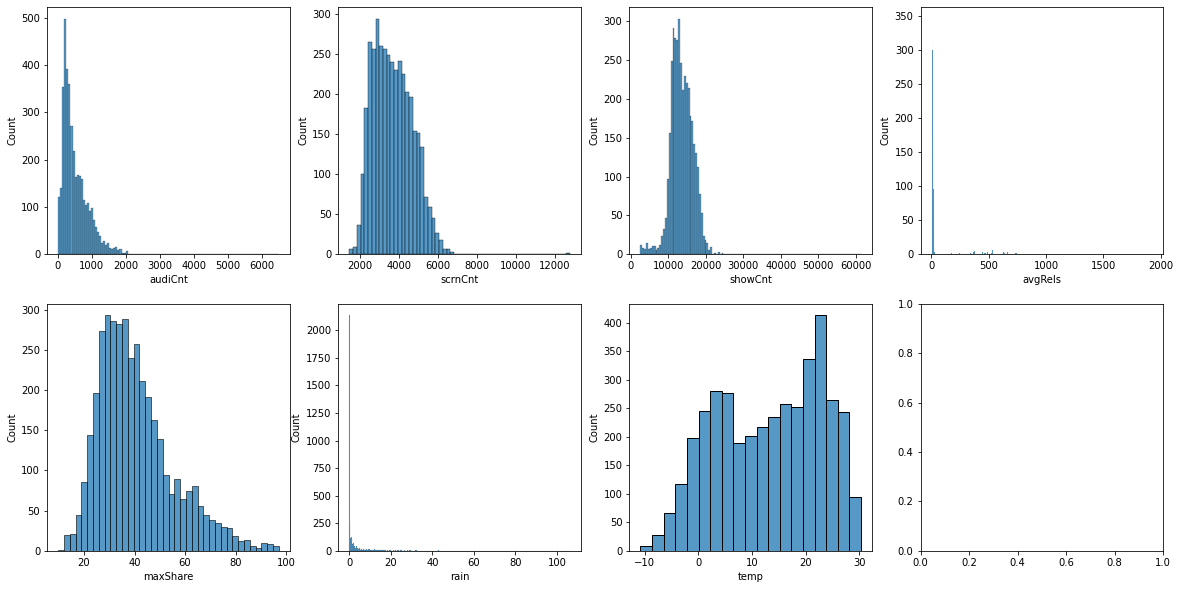

In [ ]:
# 캔버스 설정 
figure, axs = plt.subplots(nrows=2, ncols=4) # 이미지 배치 
figure.set_size_inches(20,10) # 캔버스 사이즈 설정 

# 히스토그램 표시 
for i, col in enumerate(box_df.columns[1:8]):
  sns.histplot(data=box_df, x=col, ax=axs[i//4, i%4]) # 히스토그램 그리기 

#### 코드 예제 13.2.3.-2: 시기 별 관객수 비교

[Text(0, 0.5, 'Average Audience'),
 Text(0.5, 0, 'Day'),
 Text(0.5, 1.0, 'By Day')]

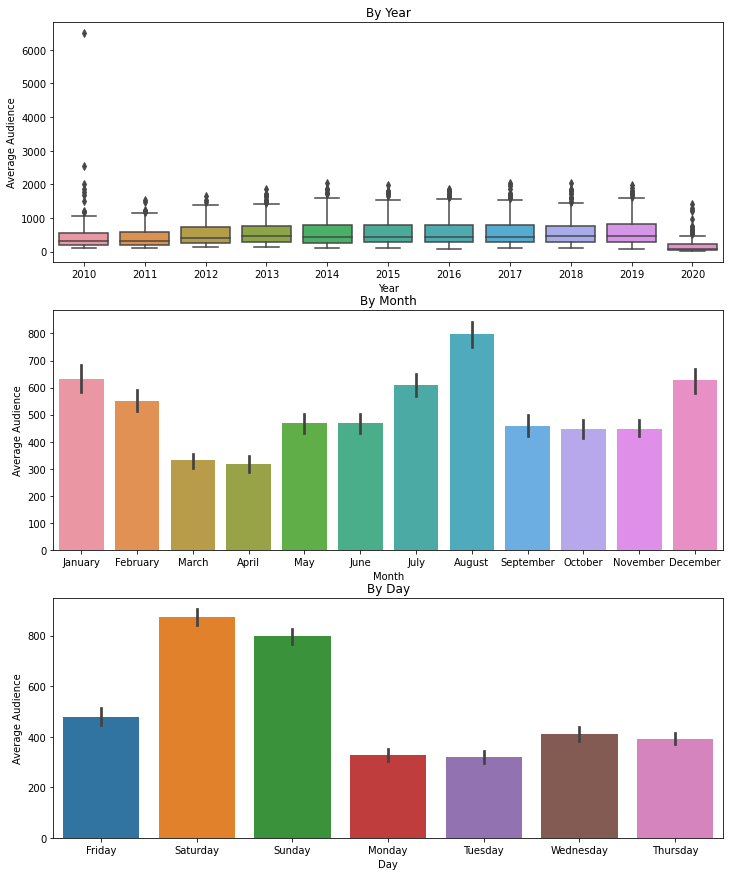

In [ ]:
# 캔버스 및 이미지 표시 설정 
figure, axs = plt.subplots(nrows=3, ncols=1) # 이미지 배치 
figure.set_size_inches(12,15) # 캔버스 크기 

# 그래프 표시 
ax1 = sns.boxplot(data=box_df, x="year", y="audiCnt", orient="v", ax=axs[0]) # 년도별 관객수
ax2 = sns.barplot(data=box_df, x="month", y="audiCnt", ax=axs[1]) # 월별 관객수
ax3 = sns.barplot(data=box_df, x="day", y="audiCnt", ax=axs[2]) # 일별 관객수
 
 # 그래프 주석 
ax1.set(xlabel="Year", ylabel='Average Audience', title="By Year") #첫번째 이미지의 주석 설정 
ax2.set(xlabel='Month', ylabel='Average Audience', title="By Month") #두번째 이미지의 주석 설정 
ax3.set(xlabel='Day', ylabel='Average Audience', title="By Day") #세번째 이미지의 주석 설정 

#### 코드 예제: 13.2.3-3: 날씨와 영화 일일관객수 시각화

[Text(0, 0.5, 'Average Audience'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Temperature and Audience')]

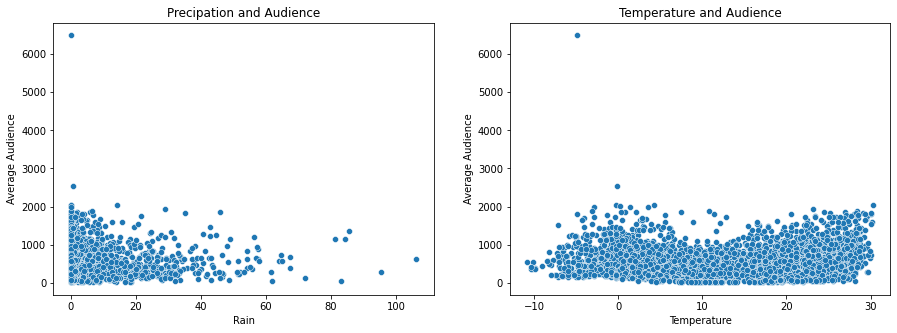

In [ ]:
# 캔버스 및 이미지 표시 설정  
fig, axs =  plt.subplots(nrows=1, ncols=2)  
fig.set_size_inches(15,5) 

# 그래프 표시 
ax1 = sns.scatterplot(x="rain", y="audiCnt", data=box_df, ax=axs[0]) # 강수량별 관객수의 관계
ax2 = sns.scatterplot(x="temp", y="audiCnt", data=box_df, ax=axs[1]) # 평균기온과 관객수의 관계

# 그래프 주석 

ax1.set(xlabel="Rain", ylabel='Average Audience', title="Precipation and Audience") #첫번째 이미지의 주석 설정 
ax2.set(xlabel="Temperature", ylabel='Average Audience', title="Temperature and Audience") #두번째 이미지의 주석 설정 


## 13.3. 예측 모델 만들기

#### [코드 예제 13.3.1-1: 데이터 프레임 준비]

In [ ]:
# 데이터 프레임 준비 
raw_bf2020 = box_df[box_df['year']!=2020] # 2020년 데이터 제거 
print("2019년 까지의 데이터는 {}행과 {}열로 이루어져 있습니다".format(*raw_bf2020.shape)) 

2019년 까지의 데이터는 3652행과 30열로 이루어져 있습니다


In [ ]:
#관객 데이터
Y = raw_bf2020[['audiCnt']]
#예측에 사용할 특성들
X = raw_bf2020.drop(columns=['audiCnt','date','year','month','day'], axis=1) 

In [ ]:
# 예측하고자 하는 변수들
Y.head()

,audiCnt
0,6492.235
1,2538.574
2,2000.084
3,668.868
4,650.058


In [ ]:
# 예측에 사용하는 변수들
X.head()

,scrnCnt,showCnt,avgRels,maxShare,rain,temp,April,August,December,February,January,July,June,March,May,November,October,September,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,12785,61400,13.3,44.9,0.0,-4.9,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5150,24524,14.3,44.8,0.8,-0.1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5102,23140,15.3,45.9,0.0,-2.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4810,21522,12.0,53.4,5.9,-1.8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4768,21196,16.0,51.3,0.7,-5.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### [코드 예제: 13.3.2-1: 훈련 및 검증셋으로 데이터 분리]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=.25, random_state=0) #학습/검증 셋으로 분리. 

print("총 데이터 셋의 크기: {2}, 학습 셋의 크기: {0}, 검증 셋의 크기: {1}". 
      format(len(X_train), len(X_test), len(box_df))) # 학습/검증셋의 비율 확인

총 데이터 셋의 크기: 3926, 학습 셋의 크기: 2739, 검증 셋의 크기: 913


In [ ]:
features=['scrnCnt','showCnt','avgRels','maxShare','rain','temp'] # 훈련 데이터셋의 열 이름을 Features라는 변수로 저장 
print(features)

['scrnCnt', 'showCnt', 'avgRels', 'maxShare', 'rain', 'temp']


#### [코드 예제 13.3.3-1: 회귀분석 모델 설정]

In [ ]:
# 회귀분석 모델 설정
regr = linear_model.LinearRegression()  
# 학습 데이터셋에 들어있는 특성을 사용하여 관객수를 예측 
regr.fit(X_train[features], y_train['audiCnt']) 

LinearRegression()

[코드 예제 13.3.3-2: 모델 학습 결과 출력] 

In [ ]:
# 회귀모델의 절편 출력 
print('모델의 절편: {int:8.3f}'.format(int=regr.intercept_)) 

# for/loop에서 enumerate을 통해 레이블과 Index 번호를 호출하고 이를 통해 각 특성의 계수를 출력함.  
for i, labels in enumerate(features): 
    print('특성 ({lab:11})의 회귀 계수 값은 : {coef:8.3f}'.format(lab=labels, coef=regr.coef_[i]))  


모델의 절편: -703.486
특성 (scrnCnt    )의 회귀 계수 값은 :   -0.095
특성 (showCnt    )의 회귀 계수 값은 :    0.105
특성 (avgRels    )의 회귀 계수 값은 :   -0.149
특성 (maxShare   )의 회귀 계수 값은 :    3.818
특성 (rain       )의 회귀 계수 값은 :    1.445
특성 (temp       )의 회귀 계수 값은 :   -0.518


#### [코드 예제 13.3.3-3: 회귀 계수 시각화] 

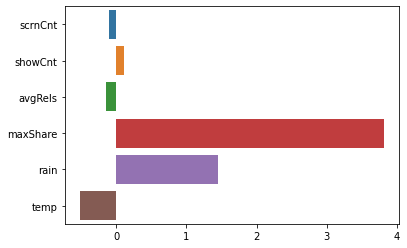

In [ ]:
# 회귀계수 시각화 
# 이미지 사이즈 설정
figure.set_size_inches(5, 5) 
# 가로축을 회귀계수, 세로 축을 각 특성으로 하는 막대 그래프 생성
sns.barplot(x=regr.coef_, y=features) 

In [ ]:
# 전체영화상영횟수와 점유율편차의 기술통계량
X_train[['showCnt','rain']].describe()

,showCnt,rain
count,2739.000000,2739.000000
mean,13744.646221,3.377802
std,2700.634304,8.523330
min,7554.000000,0.000000
25%,11750.000000,0.000000
50%,13423.000000,0.100000
75%,15510.500000,2.000000
max,61400.000000,95.500000


## 13.4. 정규화(Standardization)

#### [코드 예제 13.4-1: 데이터 정규화] 

In [ ]:
# 정규화를 하기 위해 필요한 데이터 지정
raw_bf2020_new = raw_bf2020.drop(columns=['date','year','month','day'], axis=1) 

# 정규화를 위한 스케일러 만들기 
scaler = StandardScaler()
scaler.fit(raw_bf2020_new) # 각 데이터값 최소, 최대값 파악 
scaled = scaler.transform(raw_bf2020_new) # 데이터 정규화 적용 

type(scaled)

numpy.ndarray

#### [코드 예제 13.4-2: 정규환된 데이터의 데이터 프레임화] 

In [ ]:
# 데이터 프레임화 
scaled = pd.DataFrame(scaled, columns=raw_bf2020_new.columns) 
# 데이터 중 일부의 기술통계 파악
scaled[['audiCnt','scrnCnt','showCnt','avgRels','maxShare','rain','temp']].describe()

,audiCnt,scrnCnt,showCnt,avgRels,maxShare,rain,temp
count,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03
mean,1.635238e-16,3.404846e-16,-4.595326e-16,3.149635e-16,5.402153e-16,-3.879396e-16,-2.036828e-17
std,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00
min,-1.210693e+00,-1.825315e+00,-2.303267e+00,-3.742972e-01,-1.775119e+00,-3.944861e-01,-2.439006e+00
25%,-7.507376e-01,-8.189611e-01,-7.484032e-01,-3.326680e-01,-7.326655e-01,-3.944861e-01,-8.847085e-01
50%,-3.226766e-01,-1.062006e-01,-1.276611e-01,-3.180707e-01,-2.044888e-01,-3.830855e-01,8.672756e-02
75%,4.992266e-01,7.399655e-01,6.652780e-01,-2.969858e-01,5.043799e-01,-1.550748e-01,8.843277e-01
max,1.556953e+01,9.178635e+00,1.763677e+01,8.461366e+00,3.923629e+00,1.172429e+01,1.763733e+00


#### [코드 예제 13.4-3: 정규화된 데이터로 예측 모델 만들기] 

특성 (scrnCnt    )의 회귀 계수 값은 :   -0.246
특성 (showCnt    )의 회귀 계수 값은 :    0.744
특성 (avgRels    )의 회귀 계수 값은 :   -0.072
특성 (maxShare   )의 회귀 계수 값은 :    0.144
특성 (rain       )의 회귀 계수 값은 :    0.033
특성 (temp       )의 회귀 계수 값은 :   -0.013


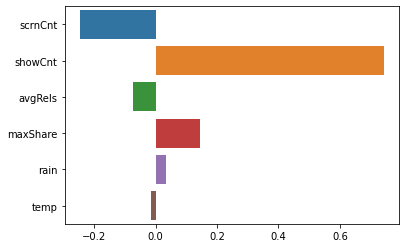

In [ ]:
#예측하고자는 특성
Y2 = scaled[['audiCnt']]
#예측에 사용할 특성들
X2 = scaled.drop(columns=['audiCnt'], axis=1)  

#학습/검증 셋으로 분리.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, Y2, test_size=.25, random_state=0)  

# 회귀분석 모델 설정 
regr_standard = linear_model.LinearRegression(fit_intercept=False)
# 학습 데이터셋에 들어있는 특성을 사용하여 관객수를 예측 
regr_standard.fit(X_train2[features], y_train2['audiCnt']) 

# 회귀 계수 출력 
for i, labels in enumerate(features): 
    print('특성 ({lab:11})의 회귀 계수 값은 : {coef:8.3f}'.format(lab=labels, coef=regr_standard.coef_[i]))  

# 회귀계수 시각화 
figure.set_size_inches(5, 5) 
sns.barplot(x=regr_standard.coef_, y=features) 


#### [코드 예제 13.4-4: 정규화 여부와 모델 성능]

In [ ]:
# 모델 예측력 평가 
reg_pred1 = regr.predict(X_test[features]) # 정규화 되지 않은 데이터로 학습한 모델
reg_pred2 = regr_standard.predict(X_test2[features]) #정규화한 데이터로 학습한 모델

# 평가지표 계산 (R2)
reg_r2_1 = sklearn.metrics.r2_score(y_test, reg_pred1) # 정규화 되지않은 데이터로 학습한 모델 평가
reg_r2_2 = sklearn.metrics.r2_score(y_test2, reg_pred2) # 정규화 된 데이터로 학습한 모델 평가 

# 결과 출력 
print("정규화되지 않은 데이터: {0:8.3f}\n정규화 된 데이터:{1:8.3f}".format(reg_r2_1, reg_r2_2))

정규화되지 않은 데이터:    0.249
정규화 된 데이터:   0.249


## 13.5. 모델 검증 및 평가

#### [코드 예제13.5.1-1: 모델 평가]

In [ ]:
# 검증데이터 셋으로 예측
reg_pred = regr.predict(X_test[features]) 
# 평가지표 계산 (R2)
reg_r2 = sklearn.metrics.r2_score(y_test, reg_pred)
# 평가지표 계산 (RMSE)
reg_rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, reg_pred))

print('\n2020년 이전 영화일일평균관객 예측 R2: {0:.3f} %'.format(reg_r2*100))
print('\n2020년 이전 영화일일평균관객 예측 RMSE: {0:.3f}'.format(reg_rmse))


2020년 이전 영화일일평균관객 예측 R2: 24.863 %

2020년 이전 영화일일평균관객 예측 RMSE: 337.486


#### [모델 13.5.2-1: K-겹 교차검증을 사용한 모델 평가]

In [ ]:
# 새로운 회귀모델 생성 
lm = linear_model.LinearRegression() 

 # K-fold 교차 검증 설정, K = 5, 데이터를 임의로 섞음 
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# K-fold R^2 스코어 구하기
r2_scores = cross_val_score(lm, X, Y, scoring='r2', cv=folds)  

# K-fold RMSE 구하기 
nrmse_scores = cross_val_score(lm, X, Y, scoring='neg_root_mean_squared_error', cv=folds) 

 # R^2값들 출력 
print("K-fold R^2 값 들: "+str(r2_scores))
print("K-fold R^2 평균값: {0:.3f}% ".format(100*r2_scores.mean())) 

# RMSE 값들 출력 
print("\nK-fold RMSE 값 들: "+str(nrmse_scores*-1)) 
print("K-fold RMSE 스코어: {0:.3f} ".format(nrmse_scores.mean()*-1))

K-fold R^2 값 들: [0.54608929 0.64518505 0.59461222 0.62426644 0.59449093]
K-fold R^2 평균값: 60.093% 

K-fold RMSE 값 들: [238.39938558 219.11266702 281.8593763  222.82138137 239.47180322]
K-fold RMSE 스코어: 240.333 


#### [코드 예제: 13.5.3-1: 모델 비교]

In [ ]:
lm2 = linear_model.LinearRegression() # 새로운 회귀모델 

# 영화관련 특성들
screen_features = ['scrnCnt', 'scrnCnt', 'showCnt', 'avgRels', 'maxShare']
# 날씨 관련 특성들
weather_features = ['rain', 'temp']
# 날짜 관련특성들 
date_features = [item for item in features if item not in screen_features if item not in weather_features]  


In [ ]:
# K-fold 교차 검증 설정, K = 5, 데이터를 랜덤하게 섞음 
folds = KFold(n_splits = 5, shuffle = True, random_state = 83731) 

In [ ]:
# 모델 평가 
# K-fold R^2 스코어 구하기 
r2_scores_a = cross_val_score(lm2, X[screen_features], Y, scoring='r2', cv=folds)
#K-fold RMSE 구하기
nrmse_scores_a = cross_val_score(lm2, X[screen_features], Y, scoring='neg_root_mean_squared_error', cv=folds)   
# K-fold R^2 스코어 구하기 
r2_scores_b = cross_val_score(lm2, X[date_features], Y, scoring='r2', cv=folds) 
# K-fold RMSE 구하기
nrmse_scores_b = cross_val_score(lm2, X[date_features], Y, scoring='neg_root_mean_squared_error', cv=folds)  
# K-fold R^2 스코어 구하기
r2_scores_c = cross_val_score(lm2, X[weather_features], Y, scoring='r2', cv=folds)  
# K-fold RMSE 구하기 
nrmse_scores_c = cross_val_score(lm2, X[weather_features], Y, scoring='neg_root_mean_squared_error', cv=folds) 

## 13.6. 학습된 모델로 2020년 영화관객 수 예측해보기  


#### [코드 예제 13.6-1: 새로운 데이터 예측]

In [ ]:
# 원시데이터에서 2020년 데이터만 분리하여 새로운 데이터 프레임 생성
raw_af2020 = box_df[box_df['year']==2020] 
print("2000년 이후의 데이터는 {}행과 {}열로 이루어져 있습니다".format(*raw_af2020.shape)) # 데이터 확인 

#2020년 데이터셋을 만듭니다
Y_af2020 = raw_af2020[['audiCnt']]
X_af2020 = raw_af2020.drop(columns=['audiCnt','date','year','month','day'], axis=1)
# 예측
reg_pred =  regr.predict(X_af2020[features])
# R^2 지표 구하기
reg_r2 = sklearn.metrics.r2_score(Y_af2020, reg_pred)
# RMSE 구하기 
reg_rmse = np.sqrt(sklearn.metrics.mean_squared_error(Y_af2020, reg_pred))

print('\n2020년 이후 영화일일평균관객 예측 RMSE: {0:.3f} %'.format(reg_r2*100))
print('\n2020년 이후 영화일일평균관객 예측 RMSE: {0:.3f}'.format(reg_rmse))